In [336]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [337]:
im = cv2.imread('Doctor_Strange_AIW_Profile.jpg')

original_shape=im.shape


In [338]:
print(im.shape)

(444, 310, 3)


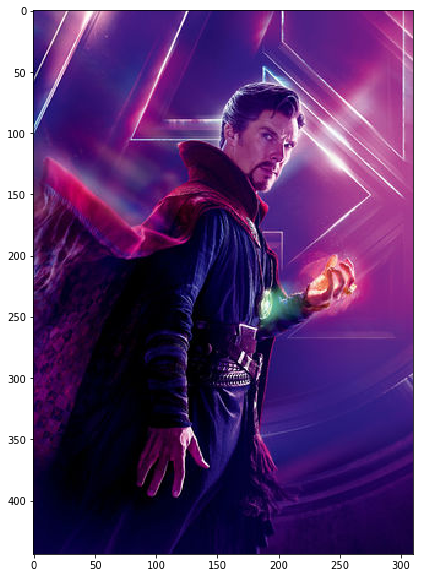

In [339]:
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

In [340]:
#Flatten Each channel of the Image
all_pixels = np.reshape(im,(-1,3))
print(all_pixels.shape)

(137640, 3)


In [341]:
from sklearn.cluster import KMeans


In [351]:
dominant_color =5

km = KMeans(n_clusters=dominant_color,random_state=2)
km.fit_predict(all_pixels)


array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [352]:
centres = km.cluster_centers_
print(centres)


[[207.97606232 163.04759207 197.54305949]
 [ 42.68170123   5.78125473  76.87925685]
 [  5.18370064   0.95493173  29.60577304]
 [ 75.67166076  30.19731227 123.20591574]
 [155.61867893  62.1297282  139.81272683]]


In [353]:
centres= np.array(centres,dtype='int32')

In [354]:
print(centres)

[[207 163 197]
 [ 42   5  76]
 [  5   0  29]
 [ 75  30 123]
 [155  62 139]]


# Plot what all colors are these

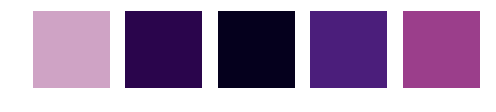

In [355]:
i = 1

plt.figure(0,figsize=(8,2))

colors=[]

for each_col in centres:
    
    plt.subplot(1,dominant_color,i)
    plt.axis('off')
    i += 1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((200,200,3),dtype='int')
    a[:,:,:] = each_col
    plt.imshow(a)

plt.show()

# Segmenting our Original Image

In [356]:
new_img = np.zeros((all_pixels.shape),dtype='int32')

print(new_img.shape)

(137640, 3)


In [357]:
colors

[array([207, 163, 197], dtype=int32),
 array([42,  5, 76], dtype=int32),
 array([ 5,  0, 29], dtype=int32),
 array([ 75,  30, 123], dtype=int32),
 array([155,  62, 139], dtype=int32)]

In [358]:
km.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

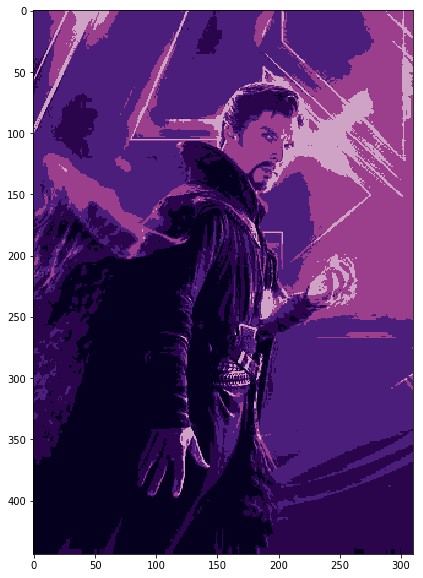

In [359]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
plt.figure(figsize=(10,10))

plt.imshow(new_img)
plt.show()